In [3]:
# Imports 
import os
import sys
sys.path.append("..")
os.environ["pyna_language"] = 'python'
import pdb
import numpy as np
import openmdao.api as om
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
%matplotlib inline
from pyNA.pyna import pyna
import scipy

from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [9]:
py = pyna()
py.initialize()
py.airframe.get_aerodynamics_deck()

In [13]:
# Create aerodynamics cubic interpolants 
A  = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
TF = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
TS = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
CL = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))
CD = np.zeros(np.size(py.airframe.aero['alpha'])*np.size(py.airframe.aero['theta_flaps'])*np.size(py.airframe.aero['theta_slats']))

cntr = -1
for i, a in enumerate(py.airframe.aero['alpha']):
    for j, tf in enumerate(py.airframe.aero['theta_flaps']):
        for k, ts in enumerate(py.airframe.aero['theta_slats']):
            cntr = cntr + 1
            A[cntr] = a
            TF[cntr] = tf
            TS[cntr] = ts
            CL[cntr] = py.airframe.aero['c_l'][i,j,k]
            CD[cntr] = py.airframe.aero['c_d'][i,j,k]

f_L = scipy.interpolate.Rbf(A, TF, TS, CL, function='cubic')
f_D = scipy.interpolate.Rbf(A, TF, TS, CD, function='cubic')
f_LD = scipy.interpolate.Rbf(A, TF, TS, CL/CD, function='cubic')

f_alpha = scipy.interpolate.Rbf(TS, TF, CL, A, function='cubic')

Text(0, 0.5, '$L/D$ [-]')

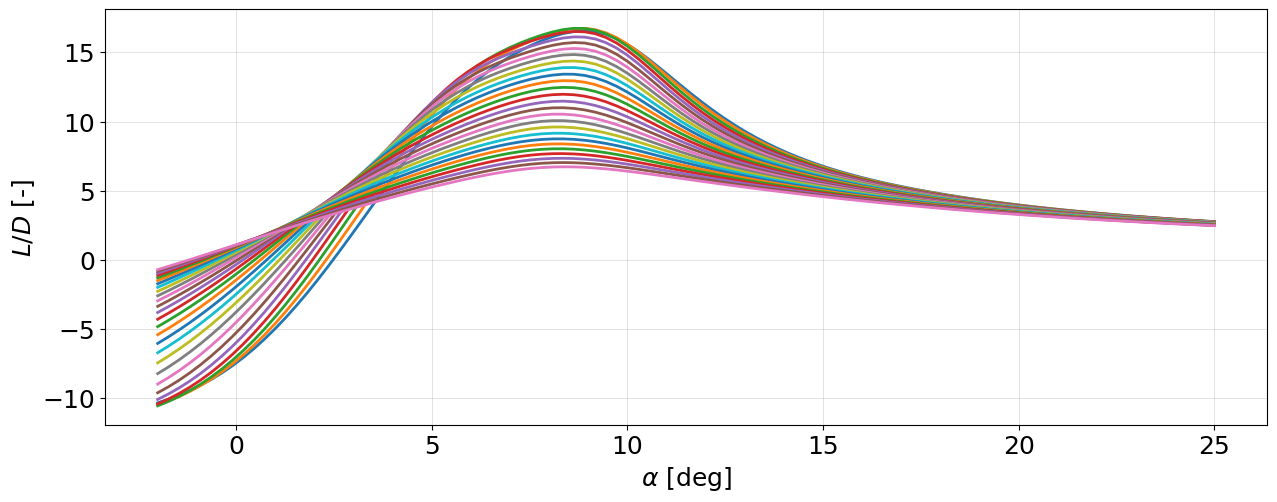

In [55]:
# Plot figure 
plt.figure(figsize=(15,5.5))
plt.style.use('../utils/plot.mplstyle')

alpha = np.linspace(-2, 25, 100)

for th_flaps in np.linspace(0, 26, 27):
    l = f_L(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
    d = f_D(alpha, th_flaps*np.ones(np.size(alpha)), -6*np.ones(np.size(alpha)))
    plt.plot(alpha, l/d, label=r'$\theta_{flaps}=$'+str(th_flaps)+' deg')
        

plt.xlabel(r'$\alpha$ [deg]')
plt.ylabel(r'$L/D$ [-]')
# plt.legend(frameon=False, loc='upper right')



In [87]:
def simple_aero_model(alpha, theta_flaps, cd0=0.04, k=0.03):

    c_l = 0.1 + 2*np.pi * (np.pi/180) * alpha + 0.005*theta_flaps
    
    c_d = cd0 + k*c_l**2 + theta_flaps*0.0005
    
    return c_l, c_d

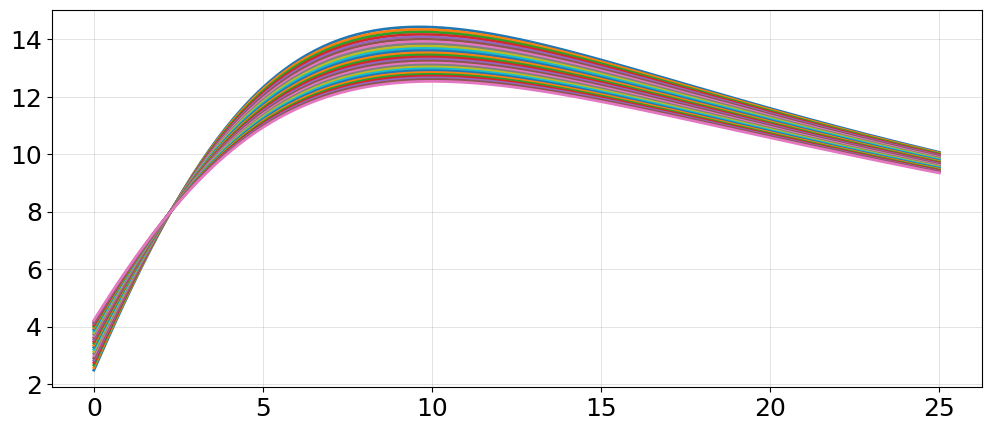

In [88]:
alpha = np.linspace(0, 25, 200)

for theta in np.linspace(0, 26, 27):

    L,D = simple_aero_model(alpha, theta)

    plt.plot(alpha, L/D)

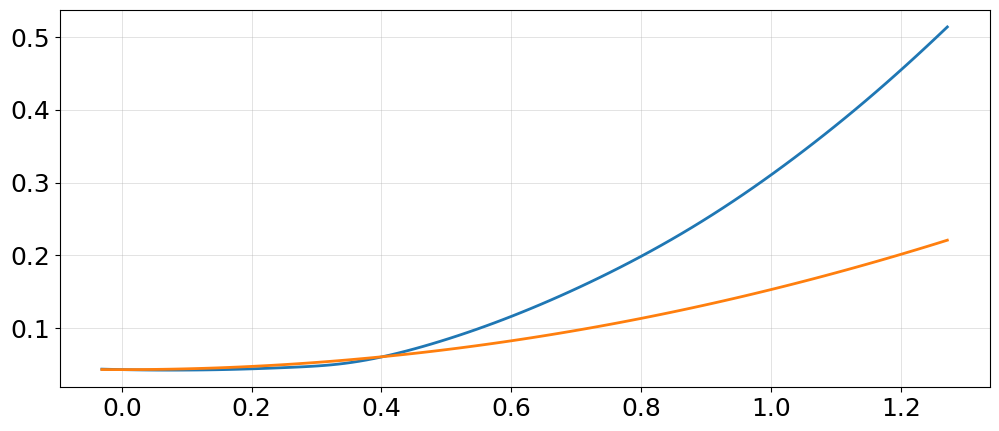

In [78]:
d[3]

0.04283670280164298